# Import Library

In [3]:
import pandas as pd  # Pandas untuk manipulasi dan analisis data
pd.options.mode.chained_assignment = None  # Menonaktifkan peringatan chaining
import numpy as np  # NumPy untuk komputasi numerik
seed = 0
np.random.seed(seed)  # Mengatur seed untuk reproduktibilitas
import matplotlib.pyplot as plt  # Matplotlib untuk visualisasi data
import seaborn as sns  # Seaborn untuk visualisasi data statistik, mengatur gaya visualisasi
from sklearn.metrics import accuracy_score

import datetime as dt  # Manipulasi data waktu dan tanggal
import re  # Modul untuk bekerja dengan ekspresi reguler
import string  # Berisi konstanta string, seperti tanda baca
from nltk.tokenize import word_tokenize  # Tokenisasi teks
from nltk.corpus import stopwords  # Daftar kata-kata berhenti dalam teks

!pip install sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory  # Stemming (penghilangan imbuhan kata) dalam bahasa Indonesia
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory  # Menghapus kata-kata berhenti dalam bahasa Indonesia

from wordcloud import WordCloud  # Membuat visualisasi berbentuk awan kata (word cloud) dari teks

import nltk  # Import pustaka NLTK (Natural Language Toolkit).
nltk.download('punkt_tab')  # Mengunduh dataset yang diperlukan untuk tokenisasi teks.
nltk.download('stopwords')  # Mengunduh dataset yang berisi daftar kata-kata berhenti (stopwords) dalam berbagai bahasa.

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Loading Data (Bonus Nomor 4, Jumlah Data Lebih dari 10.000)

In [4]:
clean_df = pd.read_csv('/content/clean_ulasan_mytelkomsel.csv')

clean_df

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,fd62da3c-55cf-4b15-b76b-03fc83dabb5a,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Aplikasi aneh, setelah update malah jadi lemot...",1,19,8.4.2,2024-12-14 05:42:57,Hai Kak Anto. Mohon maaf untuk ketidaknyamanan...,2024-12-14 06:15:23,8.4.2
1,893c8377-8428-46ce-b38d-e6586e101c2e,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Aplikasi provider yg paling sering update, tap...",2,171,8.4.2,2024-12-07 12:04:12,Hai Kak Khoirul. Mohon maaf untuk ketidaknyama...,2024-12-07 12:57:13,8.4.2
2,6c30adf7-83e1-4617-abd0-e198c108c4c4,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Aplikasi gak guna pas dibuka aplikasinya malah...,1,212,8.4.2,2024-12-03 06:29:30,Hai Kak Masdelina. Mohon maaf untuk ketidaknya...,2024-12-03 10:46:19,8.4.2
3,0bcf51ab-0447-4fc9-9b7e-d32fe60e2ecb,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Bukan masalah di HP ya kak, tp emang UI nya be...",1,23,8.4.2,2024-12-13 15:48:46,Hai Kak Achmad. Mohon maaf untuk ketidaknyaman...,2024-12-13 15:39:44,8.4.2
4,57131beb-b2e1-4612-9c6f-f244f206520e,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Sudah sering update tapi begitu buka aplikasi ...,3,24,8.4.2,2024-12-10 10:01:29,Hai Kak Isnan . Mohon maaf untuk ketidaknyaman...,2024-12-10 11:15:46,8.4.2
...,...,...,...,...,...,...,...,...,...,...,...
15192,16b5cf09-02de-4e55-9c02-d994b696786d,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Kok sering keluar sendiri terus ya... Lagi dib...,5,0,8.2.0,2024-07-24 21:37:05,"Maaf ya, Kak Budi. Terkait kendala aplikasi My...",2024-07-25 12:22:58,8.2.0
15193,ca3f8b03-81df-4ffc-9e0a-00040af953a1,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Telkomsel sering nongol paket darurat gk senga...,1,0,8.2.0,2024-08-30 00:07:13,"Hai, Kak Yuliadi. Maaf atas pengalaman yang ku...",2024-08-30 14:28:02,8.2.0
15194,34738abd-72f6-4813-9636-46149b1064c0,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,jaringan sampah dan terburuk yang pernah saya ...,1,1,8.2.0,2024-09-13 15:02:33,"Hai, Kak. Maaf banget ya. Terkait keluhan siny...",2023-12-10 06:40:18,8.2.0
15195,6b189c14-001b-4d05-b057-bae5d4821530,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Jaringan super lemottt.. Banyakin restrukturis...,1,0,8.2.0,2024-08-12 23:49:21,"Hai, Kak Ferdie. Maaf ya, mengenai keluhan aks...",2024-08-13 07:46:55,8.2.0


# Preprocessing Data

In [5]:
def cleaningText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) # remove mentions
    text = re.sub(r'#[A-Za-z0-9]+', '', text) # remove hashtag
    text = re.sub(r'RT[\s]', '', text) # remove RT
    text = re.sub(r"http\S+", '', text) # remove link
    text = re.sub(r'[0-9]+', '', text) # remove numbers
    text = re.sub(r'[^\w\s]', '', text) # remove numbers


    text = text.replace('\n', ' ') # replace new line into space
    text = text.translate(str.maketrans('', '', string.punctuation)) # remove all punctuations
    text = text.strip(' ') # remove characters space from both left and right text
    return text

def casefoldingText(text): # Converting all the characters in a text into lower case
    text = text.lower()
    return text

def tokenizingText(text): # Tokenizing or splitting a string, text into a list of tokens
    text = word_tokenize(text)
    return text

def filteringText(text): # Remove stopwors in a text
    listStopwords = set(stopwords.words('indonesian'))
    listStopwords1 = set(stopwords.words('english'))
    listStopwords.update(listStopwords1)
    listStopwords.update(['iya','yaa','gak','nya','na','sih','ku',"di","ga","ya","gaa","loh","kah","woi","woii","woy"])
    filtered = []
    for txt in text:
        if txt not in listStopwords:
            filtered.append(txt)
    text = filtered
    return text

def stemmingText(text): # Reducing a word to its word stem that affixes to suffixes and prefixes or to the roots of words
    # Membuat objek stemmer
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()

    # Memecah teks menjadi daftar kata
    words = text.split()

    # Menerapkan stemming pada setiap kata dalam daftar
    stemmed_words = [stemmer.stem(word) for word in words]

    # Menggabungkan kata-kata yang telah distem
    stemmed_text = ' '.join(stemmed_words)

    return stemmed_text

def toSentence(list_words): # Convert list of words into sentence
    sentence = ' '.join(word for word in list_words)
    return sentence

In [6]:
slangwords = {"@": "di", "abis": "habis", "wtb": "beli", "masi": "masih", "wts": "jual", "wtt": "tukar", "bgt": "banget", "maks": "maksimal", "plisss": "tolong", "bgttt": "banget", "indo": "indonesia", "bgtt": "banget", "ad": "ada", "rv": "redvelvet", "plis": "tolong", "pls": "tolong", "cr": "sumber", "cod": "bayar ditempat", "adlh": "adalah", "afaik": "as far as i know", "ahaha": "haha", "aj": "saja", "ajep-ajep": "dunia gemerlap", "ak": "saya", "akika": "aku", "akkoh": "aku", "akuwh": "aku", "alay": "norak", "alow": "halo", "ambilin": "ambilkan", "ancur": "hancur", "anjrit": "anjing", "anter": "antar", "ap2": "apa-apa", "apasih": "apa sih", "apes": "sial", "aps": "apa", "aq": "saya", "aquwh": "aku", "asbun": "asal bunyi", "aseekk": "asyik", "asekk": "asyik", "asem": "asam", "aspal": "asli tetapi palsu", "astul": "asal tulis", "ato": "atau", "au ah": "tidak mau tahu", "awak": "saya", "ay": "sayang", "ayank": "sayang", "b4": "sebelum", "bakalan": "akan", "bandes": "bantuan desa", "bangedh": "banget", "banpol": "bantuan polisi", "banpur": "bantuan tempur", "basbang": "basi", "bcanda": "bercanda", "bdg": "bandung", "begajulan": "nakal", "beliin": "belikan", "bencong": "banci", "bentar": "sebentar", "ber3": "bertiga", "beresin": "membereskan", "bete": "bosan", "beud": "banget", "bg": "abang", "bgmn": "bagaimana", "bgt": "banget", "bijimane": "bagaimana", "bintal": "bimbingan mental", "bkl": "akan", "bknnya": "bukannya", "blegug": "bodoh", "blh": "boleh", "bln": "bulan", "blum": "belum", "bnci": "benci", "bnran": "yang benar", "bodor": "lucu", "bokap": "ayah", "boker": "buang air besar", "bokis": "bohong", "boljug": "boleh juga", "bonek": "bocah nekat", "boyeh": "boleh", "br": "baru", "brg": "bareng", "bro": "saudara laki-laki", "bru": "baru", "bs": "bisa", "bsen": "bosan", "bt": "buat", "btw": "ngomong-ngomong", "buaya": "tidak setia", "bubbu": "tidur", "bubu": "tidur", "bumil": "ibu hamil", "bw": "bawa", "bwt": "buat", "byk": "banyak", "byrin": "bayarkan", "cabal": "sabar", "cadas": "keren", "calo": "makelar", "can": "belum", "capcus": "pergi", "caper": "cari perhatian", "ce": "cewek", "cekal": "cegah tangkal", "cemen": "penakut", "cengengesan": "tertawa", "cepet": "cepat", "cew": "cewek", "chuyunk": "sayang", "cimeng": "ganja", "cipika cipiki": "cium pipi kanan cium pipi kiri", "ciyh": "sih", "ckepp": "cakep", "ckp": "cakep", "cmiiw": "correct me if i'm wrong", "cmpur": "campur", "cong": "banci", "conlok": "cinta lokasi", "cowwyy": "maaf", "cp": "siapa", "cpe": "capek", "cppe": "capek", "cucok": "cocok", "cuex": "cuek", "cumi": "Cuma miscall", "cups": "culun", "curanmor": "pencurian kendaraan bermotor", "curcol": "curahan hati colongan", "cwek": "cewek", "cyin": "cinta", "d": "di", "dah": "deh", "dapet": "dapat", "de": "adik", "dek": "adik", "demen": "suka", "deyh": "deh", "dgn": "dengan", "diancurin": "dihancurkan", "dimaafin": "dimaafkan", "dimintak": "diminta", "disono": "di sana", "dket": "dekat", "dkk": "dan kawan-kawan", "dll": "dan lain-lain", "dlu": "dulu", "dngn": "dengan", "dodol": "bodoh", "doku": "uang", "dongs": "dong", "dpt": "dapat", "dri": "dari", "drmn": "darimana", "drtd": "dari tadi", "dst": "dan seterusnya", "dtg": "datang", "duh": "aduh", "duren": "durian", "ed": "edisi", "egp": "emang gue pikirin", "eke": "aku", "elu": "kamu", "emangnya": "memangnya", "emng": "memang", "endak": "tidak", "enggak": "tidak", "envy": "iri", "ex": "mantan", "fax": "facsimile", "fifo": "first in first out", "folbek": "follow back", "fyi": "sebagai informasi", "gaada": "tidak ada uang", "gag": "tidak", "gaje": "tidak jelas", "gak papa": "tidak apa-apa", "gan": "juragan", "gaptek": "gagap teknologi", "gatek": "gagap teknologi", "gawe": "kerja", "gbs": "tidak bisa", "gebetan": "orang yang disuka", "geje": "tidak jelas", "gepeng": "gelandangan dan pengemis", "ghiy": "lagi", "gile": "gila", "gimana": "bagaimana", "gino": "gigi nongol", "githu": "gitu", "gj": "tidak jelas", "gmana": "bagaimana", "gn": "begini", "goblok": "bodoh", "golput": "golongan putih", "gowes": "mengayuh sepeda", "gpny": "tidak punya", "gr": "gede rasa", "gretongan": "gratisan", "gtau": "tidak tahu", "gua": "saya", "guoblok": "goblok", "gw": "saya", "ha": "tertawa", "haha": "tertawa", "hallow": "halo", "hankam": "pertahanan dan keamanan", "hehe": "he", "helo": "halo", "hey": "hai", "hlm": "halaman", "hny": "hanya", "hoax": "isu bohong", "hr": "hari", "hrus": "harus", "hubdar": "perhubungan darat", "huff": "mengeluh", "hum": "rumah", "humz": "rumah", "ilang": "hilang", "ilfil": "tidak suka", "imho": "in my humble opinion", "imoetz": "imut", "item": "hitam", "itungan": "hitungan", "iye": "iya", "ja": "saja", "jadiin": "jadi", "jaim": "jaga image", "jayus": "tidak lucu", "jdi": "jadi", "jem": "jam", "jga": "juga", "jgnkan": "jangankan", "jir": "anjing", "jln": "jalan", "jomblo": "tidak punya pacar", "jubir": "juru bicara", "jutek": "galak", "k": "ke", "kab": "kabupaten", "kabor": "kabur", "kacrut": "kacau", "kadiv": "kepala divisi", "kagak": "tidak", "kalo": "kalau", "kampret": "sialan", "kamtibmas": "keamanan dan ketertiban masyarakat", "kamuwh": "kamu", "kanwil": "kantor wilayah", "karna": "karena", "kasubbag": "kepala subbagian", "katrok": "kampungan", "kayanya": "kayaknya", "kbr": "kabar", "kdu": "harus", "kec": "kecamatan", "kejurnas": "kejuaraan nasional", "kekeuh": "keras kepala", "kel": "kelurahan", "kemaren": "kemarin", "kepengen": "mau", "kepingin": "mau", "kepsek": "kepala sekolah", "kesbang": "kesatuan bangsa", "kesra": "kesejahteraan rakyat", "ketrima": "diterima", "kgiatan": "kegiatan", "kibul": "bohong", "kimpoi": "kawin", "kl": "kalau", "klianz": "kalian", "kloter": "kelompok terbang", "klw": "kalau", "km": "kamu", "kmps": "kampus", "kmrn": "kemarin", "knal": "kenal", "knp": "kenapa", "kodya": "kota madya", "komdis": "komisi disiplin", "komsov": "komunis sovyet", "kongkow": "kumpul bareng teman-teman", "kopdar": "kopi darat", "korup": "korupsi", "kpn": "kapan", "krenz": "keren", "krm": "kirim", "kt": "kita", "ktmu": "ketemu", "ktr": "kantor", "kuper": "kurang pergaulan", "kw": "imitasi", "kyk": "seperti", "la": "lah", "lam": "salam", "lamp": "lampiran", "lanud": "landasan udara", "latgab": "latihan gabungan", "lebay": "berlebihan", "leh": "boleh", "lelet": "lambat", "lemot": "lambat", "lgi": "lagi", "lgsg": "langsung", "liat": "lihat", "litbang": "penelitian dan pengembangan", "lmyn": "lumayan", "lo": "kamu", "loe": "kamu", "lola": "lambat berfikir", "louph": "cinta", "low": "kalau", "lp": "lupa", "luber": "langsung, umum, bebas, dan rahasia", "luchuw": "lucu", "lum": "belum", "luthu": "lucu", "lwn": "lawan", "maacih": "terima kasih", "mabal": "bolos", "macem": "macam", "macih": "masih", "maem": "makan", "magabut": "makan gaji buta", "maho": "homo", "mak jang": "kaget", "maksain": "memaksa", "malem": "malam", "mam": "makan", "maneh": "kamu", "maniez": "manis", "mao": "mau", "masukin": "masukkan", "melu": "ikut", "mepet": "dekat sekali", "mgu": "minggu", "migas": "minyak dan gas bumi", "mikol": "minuman beralkohol", "miras": "minuman keras", "mlah": "malah", "mngkn": "mungkin", "mo": "mau", "mokad": "mati", "moso": "masa", "mpe": "sampai", "msk": "masuk", "mslh": "masalah", "mt": "makan teman", "mubes": "musyawarah besar", "mulu": "melulu", "mumpung": "selagi", "munas": "musyawarah nasional", "muntaber": "muntah dan berak", "musti": "mesti", "muupz": "maaf", "mw": "now watching", "n": "dan", "nanam": "menanam", "nanya": "bertanya", "napa": "kenapa", "napi": "narapidana", "napza": "narkotika, alkohol, psikotropika, dan zat adiktif ", "narkoba": "narkotika, psikotropika, dan obat terlarang", "nasgor": "nasi goreng", "nda": "tidak", "ndiri": "sendiri", "ne": "ini", "nekolin": "neokolonialisme", "nembak": "menyatakan cinta", "ngabuburit": "menunggu berbuka puasa", "ngaku": "mengaku", "ngambil": "mengambil", "nganggur": "tidak punya pekerjaan", "ngapah": "kenapa", "ngaret": "terlambat", "ngasih": "memberikan", "ngebandel": "berbuat bandel", "ngegosip": "bergosip", "ngeklaim": "mengklaim", "ngeksis": "menjadi eksis", "ngeles": "berkilah", "ngelidur": "menggigau", "ngerampok": "merampok", "ngga": "tidak", "ngibul": "berbohong", "ngiler": "mau", "ngiri": "iri", "ngisiin": "mengisikan", "ngmng": "bicara", "ngomong": "bicara", "ngubek2": "mencari-cari", "ngurus": "mengurus", "nie": "ini", "nih": "ini", "niyh": "nih", "nmr": "nomor", "nntn": "nonton", "nobar": "nonton bareng", "np": "now playing", "ntar": "nanti", "ntn": "nonton", "numpuk": "bertumpuk", "nutupin": "menutupi", "nyari": "mencari", "nyekar": "menyekar", "nyicil": "mencicil", "nyoblos": "mencoblos", "nyokap": "ibu", "ogah": "tidak mau", "ol": "online", "ongkir": "ongkos kirim", "oot": "out of topic", "org2": "orang-orang", "ortu": "orang tua", "otda": "otonomi daerah", "otw": "on the way, sedang di jalan", "pacal": "pacar", "pake": "pakai", "pala": "kepala", "pansus": "panitia khusus", "parpol": "partai politik", "pasutri": "pasangan suami istri", "pd": "pada", "pede": "percaya diri", "pelatnas": "pemusatan latihan nasional", "pemda": "pemerintah daerah", "pemkot": "pemerintah kota", "pemred": "pemimpin redaksi", "penjas": "pendidikan jasmani", "perda": "peraturan daerah", "perhatiin": "perhatikan", "pesenan": "pesanan", "pgang": "pegang", "pi": "tapi", "pilkada": "pemilihan kepala daerah", "pisan": "sangat", "pk": "penjahat kelamin", "plg": "paling", "pmrnth": "pemerintah", "polantas": "polisi lalu lintas", "ponpes": "pondok pesantren", "pp": "pulang pergi", "prg": "pergi", "prnh": "pernah", "psen": "pesan", "pst": "pasti", "pswt": "pesawat", "pw": "posisi nyaman", "qmu": "kamu", "rakor": "rapat koordinasi", "ranmor": "kendaraan bermotor", "re": "reply", "ref": "referensi", "rehab": "rehabilitasi", "rempong": "sulit", "repp": "balas", "restik": "reserse narkotika", "rhs": "rahasia", "rmh": "rumah", "ru": "baru", "ruko": "rumah toko", "rusunawa": "rumah susun sewa", "ruz": "terus", "saia": "saya", "salting": "salah tingkah", "sampe": "sampai", "samsek": "sama sekali", "sapose": "siapa", "satpam": "satuan pengamanan", "sbb": "sebagai berikut", "sbh": "sebuah", "sbnrny": "sebenarnya", "scr": "secara", "sdgkn": "sedangkan", "sdkt": "sedikit", "se7": "setuju", "sebelas dua belas": "mirip", "sembako": "sembilan bahan pokok", "sempet": "sempat", "sendratari": "seni drama tari", "sgt": "sangat", "shg": "sehingga", "siech": "sih", "sikon": "situasi dan kondisi", "sinetron": "sinema elektronik", "siramin": "siramkan", "sj": "saja", "skalian": "sekalian", "sklh": "sekolah", "skt": "sakit", "slesai": "selesai", "sll": "selalu", "slma": "selama", "slsai": "selesai", "smpt": "sempat", "smw": "semua", "sndiri": "sendiri", "soljum": "sholat jumat", "songong": "sombong", "sory": "maaf", "sosek": "sosial-ekonomi", "sotoy": "sok tahu", "spa": "siapa", "sppa": "siapa", "spt": "seperti", "srtfkt": "sertifikat", "stiap": "setiap", "stlh": "setelah", "suk": "masuk", "sumpek": "sempit", "syg": "sayang", "t4": "tempat", "tajir": "kaya", "tau": "tahu", "taw": "tahu", "td": "tadi", "tdk": "tidak", "teh": "kakak perempuan", "telat": "terlambat", "telmi": "telat berpikir", "temen": "teman", "tengil": "menyebalkan", "tepar": "terkapar", "tggu": "tunggu", "tgu": "tunggu", "thankz": "terima kasih", "thn": "tahun", "tilang": "bukti pelanggaran", "tipiwan": "TvOne", "tks": "terima kasih", "tlp": "telepon", "tls": "tulis", "tmbah": "tambah", "tmen2": "teman-teman", "tmpah": "tumpah", "tmpt": "tempat", "tngu": "tunggu", "tnyta": "ternyata", "tokai": "tai", "toserba": "toko serba ada", "tpi": "tapi", "trdhulu": "terdahulu", "trima": "terima kasih", "trm": "terima", "trs": "terus", "trutama": "terutama", "ts": "penulis", "tst": "tahu sama tahu", "ttg": "tentang", "tuch": "tuh", "tuir": "tua", "tw": "tahu", "u": "kamu", "ud": "sudah", "udah": "sudah", "ujg": "ujung", "ul": "ulangan", "unyu": "lucu", "uplot": "unggah", "urang": "saya", "usah": "perlu", "utk": "untuk", "valas": "valuta asing", "w/": "dengan", "wadir": "wakil direktur", "wamil": "wajib militer", "warkop": "warung kopi", "warteg": "warung tegal", "wat": "buat", "wkt": "waktu", "wtf": "what the fuck", "xixixi": "tertawa", "ya": "iya", "yap": "iya", "yaudah": "ya sudah", "yawdah": "ya sudah", "yg": "yang", "yl": "yang lain", "yo": "iya", "yowes": "ya sudah", "yup": "iya", "7an": "tujuan", "ababil": "abg labil", "acc": "accord", "adlah": "adalah", "adoh": "aduh", "aha": "tertawa", "aing": "saya", "aja": "saja", "ajj": "saja", "aka": "dikenal juga sebagai", "akko": "aku", "akku": "aku", "akyu": "aku", "aljasa": "asal jadi saja", "ama": "sama", "ambl": "ambil", "anjir": "anjing", "ank": "anak", "ap": "apa", "apaan": "apa", "ape": "apa", "aplot": "unggah", "apva": "apa", "aqu": "aku", "asap": "sesegera mungkin", "aseek": "asyik", "asek": "asyik", "aseknya": "asyiknya", "asoy": "asyik", "astrojim": "astagfirullahaladzim", "ath": "kalau begitu", "atuh": "kalau begitu", "ava": "avatar", "aws": "awas", "ayang": "sayang", "ayok": "ayo", "bacot": "banyak bicara", "bales": "balas", "bangdes": "pembangunan desa", "bangkotan": "tua", "banpres": "bantuan presiden", "bansarkas": "bantuan sarana kesehatan", "bazis": "badan amal, zakat, infak, dan sedekah", "bcoz": "karena", "beb": "sayang", "bejibun": "banyak", "belom": "belum", "bener": "benar", "ber2": "berdua", "berdikari": "berdiri di atas kaki sendiri", "bet": "banget", "beti": "beda tipis", "beut": "banget", "bgd": "banget", "bgs": "bagus", "bhubu": "tidur", "bimbuluh": "bimbingan dan penyuluhan", "bisi": "kalau-kalau", "bkn": "bukan", "bl": "beli", "blg": "bilang", "blm": "belum", "bls": "balas", "bnchi": "benci", "bngung": "bingung", "bnyk": "banyak", "bohay": "badan aduhai", "bokep": "porno", "bokin": "pacar", "bole": "boleh", "bolot": "bodoh", "bonyok": "ayah ibu", "bpk": "bapak", "brb": "segera kembali", "brngkt": "berangkat", "brp": "berapa", "brur": "saudara laki-laki", "bsa": "bisa", "bsk": "besok", "bu_bu": "tidur", "bubarin": "bubarkan", "buber": "buka bersama", "bujubune": "luar biasa", "buser": "buru sergap", "bwhn": "bawahan", "byar": "bayar", "byr": "bayar", "c8": "chat", "cabut": "pergi", "caem": "cakep", "cama-cama": "sama-sama", "cangcut": "celana dalam", "cape": "capek", "caur": "jelek", "cekak": "tidak ada uang", "cekidot": "coba lihat", "cemplungin": "cemplungkan", "ceper": "pendek", "ceu": "kakak perempuan", "cewe": "cewek", "cibuk": "sibuk", "cin": "cinta", "ciye": "cie", "ckck": "ck", "clbk": "cinta lama bersemi kembali", "cmpr": "campur", "cnenk": "senang", "congor": "mulut", "cow": "cowok", "coz": "karena", "cpa": "siapa", "gokil": "gila", "gombal": "suka merayu", "gpl": "tidak pakai lama", "gpp": "tidak apa-apa", "gretong": "gratis", "gt": "begitu", "gtw": "tidak tahu", "gue": "saya", "guys": "teman-teman", "gws": "cepat sembuh", "haghaghag": "tertawa", "hakhak": "tertawa", "handak": "bahan peledak", "hansip": "pertahanan sipil", "hellow": "halo", "helow": "halo", "hi": "hai", "hlng": "hilang", "hnya": "hanya", "houm": "rumah", "hrs": "harus", "hubad": "hubungan angkatan darat", "hubla": "perhubungan laut", "huft": "mengeluh", "humas": "hubungan masyarakat", "idk": "saya tidak tahu", "ilfeel": "tidak suka", "imba": "jago sekali", "imoet": "imut", "info": "informasi", "itung": "hitung", "isengin": "bercanda", "iyala": "iya lah", "iyo": "iya", "jablay": "jarang dibelai", "jadul": "jaman dulu", "jancuk": "anjing", "jd": "jadi", "jdikan": "jadikan", "jg": "juga", "jgn": "jangan", "jijay": "jijik", "jkt": "jakarta", "jnj": "janji", "jth": "jatuh", "jurdil": "jujur adil", "jwb": "jawab", "ka": "kakak", "kabag": "kepala bagian", "kacian": "kasihan", "kadit": "kepala direktorat", "kaga": "tidak", "kaka": "kakak", "kamtib": "keamanan dan ketertiban", "kamuh": "kamu", "kamyu": "kamu", "kapt": "kapten", "kasat": "kepala satuan", "kasubbid": "kepala subbidang", "kau": "kamu", "kbar": "kabar", "kcian": "kasihan", "keburu": "terlanjur", "kedubes": "kedutaan besar", "kek": "seperti", "keknya": "kayaknya", "keliatan": "kelihatan", "keneh": "masih", "kepikiran": "terpikirkan", "kepo": "mau tahu urusan orang", "kere": "tidak punya uang", "kesian": "kasihan", "ketauan": "ketahuan", "keukeuh": "keras kepala", "khan": "kan", "kibus": "kaki busuk", "kk": "kakak", "klian": "kalian", "klo": "kalau", "kluarga": "keluarga", "klwrga": "keluarga", "kmari": "kemari", "kmpus": "kampus", "kn": "kan", "knl": "kenal", "knpa": "kenapa", "kog": "kok", "kompi": "komputer", "komtiong": "komunis Tiongkok", "konjen": "konsulat jenderal", "koq": "kok", "kpd": "kepada", "kptsan": "keputusan", "krik": "garing", "krn": "karena", "ktauan": "ketahuan", "ktny": "katanya", "kudu": "harus", "kuq": "kok", "ky": "seperti", "kykny": "kayanya", "laka": "kecelakaan", "lambreta": "lambat", "lansia": "lanjut usia", "lapas": "lembaga pemasyarakatan", "lbur": "libur", "lekong": "laki-laki", "lg": "lagi", "lgkp": "lengkap", "lht": "lihat", "linmas": "perlindungan masyarakat", "lmyan": "lumayan", "lngkp": "lengkap", "loch": "loh", "lol": "tertawa", "lom": "belum", "loupz": "cinta", "lowh": "kamu", "lu": "kamu", "luchu": "lucu", "luff": "cinta", "luph": "cinta", "lw": "kamu", "lwt": "lewat", "maaciw": "terima kasih", "mabes": "markas besar", "macem-macem": "macam-macam", "madesu": "masa depan suram", "maen": "main", "mahatma": "maju sehat bersama", "mak": "ibu", "makasih": "terima kasih", "malah": "bahkan", "malu2in": "memalukan", "mamz": "makan", "manies": "manis", "mantep": "mantap", "markus": "makelar kasus", "mba": "mbak", "mending": "lebih baik", "mgkn": "mungkin", "mhn": "mohon", "miker": "minuman keras", "milis": "mailing list", "mksd": "maksud", "mls": "malas", "mnt": "minta", "moge": "motor gede", "mokat": "mati", "mosok": "masa", "msh": "masih", "mskpn": "meskipun", "msng2": "masing-masing", "muahal": "mahal", "muker": "musyawarah kerja", "mumet": "pusing", "muna": "munafik", "munaslub": "musyawarah nasional luar biasa", "musda": "musyawarah daerah", "muup": "maaf", "muuv": "maaf", "nal": "kenal", "nangis": "menangis", "naon": "apa", "napol": "narapidana politik", "naq": "anak", "narsis": "bangga pada diri sendiri", "nax": "anak", "ndak": "tidak", "ndut": "gendut", "nekolim": "neokolonialisme", "nelfon": "menelepon", "ngabis2in": "menghabiskan", "ngakak": "tertawa", "ngambek": "marah", "ngampus": "pergi ke kampus", "ngantri": "mengantri", "ngapain": "sedang apa", "ngaruh": "berpengaruh", "ngawur": "berbicara sembarangan", "ngeceng": "kumpul bareng-bareng", "ngeh": "sadar", "ngekos": "tinggal di kos", "ngelamar": "melamar", "ngeliat": "melihat", "ngemeng": "bicara terus-terusan", "ngerti": "mengerti", "nggak": "tidak", "ngikut": "ikut", "nginep": "menginap", "ngisi": "mengisi", "ngmg": "bicara", "ngocol": "lucu", "ngomongin": "membicarakan", "ngumpul": "berkumpul", "ni": "ini", "nyasar": "tersesat", "nyariin": "mencari", "nyiapin": "mempersiapkan", "nyiram": "menyiram", "nyok": "ayo", "o/": "oleh", "ok": "ok", "priksa": "periksa", "pro": "profesional", "psn": "pesan", "psti": "pasti", "puanas": "panas", "qmo": "kamu", "qt": "kita", "rame": "ramai", "raskin": "rakyat miskin", "red": "redaksi", "reg": "register", "rejeki": "rezeki", "renstra": "rencana strategis", "reskrim": "reserse kriminal", "sni": "sini", "somse": "sombong sekali", "sorry": "maaf", "sosbud": "sosial-budaya", "sospol": "sosial-politik", "sowry": "maaf", "spd": "sepeda", "sprti": "seperti", "spy": "supaya", "stelah": "setelah", "subbag": "subbagian", "sumbangin": "sumbangkan", "sy": "saya", "syp": "siapa", "tabanas": "tabungan pembangunan nasional", "tar": "nanti", "taun": "tahun", "tawh": "tahu", "tdi": "tadi", "te2p": "tetap", "tekor": "rugi", "telkom": "telekomunikasi", "telp": "telepon", "temen2": "teman-teman", "tengok": "menjenguk", "terbitin": "terbitkan", "tgl": "tanggal", "thanks": "terima kasih", "thd": "terhadap", "thx": "terima kasih", "tipi": "TV", "tkg": "tukang", "tll": "terlalu", "tlpn": "telepon", "tman": "teman", "tmbh": "tambah", "tmn2": "teman-teman", "tmph": "tumpah", "tnda": "tanda", "tnh": "tanah", "togel": "toto gelap", "tp": "tapi", "tq": "terima kasih", "trgntg": "tergantung", "trims": "terima kasih", "cb": "coba", "y": "ya", "munfik": "munafik", "reklamuk": "reklamasi", "sma": "sama", "tren": "trend", "ngehe": "kesal", "mz": "mas", "analisise": "analisis", "sadaar": "sadar", "sept": "september", "nmenarik": "menarik", "zonk": "bodoh", "rights": "benar", "simiskin": "miskin", "ngumpet": "sembunyi", "hardcore": "keras", "akhirx": "akhirnya", "solve": "solusi", "watuk": "batuk", "ngebully": "intimidasi", "masy": "masyarakat", "still": "masih", "tauk": "tahu", "mbual": "bual", "tioghoa": "tionghoa", "ngentotin": "senggama", "kentot": "senggama", "faktakta": "fakta", "sohib": "teman", "rubahnn": "rubah", "trlalu": "terlalu", "nyela": "cela", "heters": "pembenci", "nyembah": "sembah", "most": "paling", "ikon": "lambang", "light": "terang", "pndukung": "pendukung", "setting": "atur", "seting": "akting", "next": "lanjut", "waspadalah": "waspada", "gantengsaya": "ganteng", "parte": "partai", "nyerang": "serang", "nipu": "tipu", "ktipu": "tipu", "jentelmen": "berani", "buangbuang": "buang", "tsangka": "tersangka", "kurng": "kurang", "ista": "nista", "less": "kurang", "koar": "teriak", "paranoid": "takut", "problem": "masalah", "tahi": "kotoran", "tirani": "tiran", "tilep": "tilap", "happy": "bahagia", "tak": "tidak", "penertiban": "tertib", "uasai": "kuasa", "mnolak": "tolak", "trending": "trend", "taik": "tahi", "wkwkkw": "tertawa", "ahokncc": "ahok", "istaa": "nista", "benarjujur": "jujur", "mgkin": "mungkin"}

In [7]:
def fix_slangwords(text):
    words = text.split()
    fixed_words = []

    for word in words:
        if word.lower() in slangwords:
            fixed_words.append(slangwords[word.lower()])
        else:
            fixed_words.append(word)

    fixed_text = ' '.join(fixed_words)
    return fixed_text

In [8]:
# Membersihkan teks dan menyimpannya di kolom 'text_clean'
clean_df['text_clean'] = clean_df['content'].apply(cleaningText)

# Mengubah huruf dalam teks menjadi huruf kecil dan menyimpannya di 'text_casefoldingText'
clean_df['text_casefoldingText'] = clean_df['text_clean'].apply(casefoldingText)

# Mengganti kata-kata slang dengan kata-kata standar dan menyimpannya di 'text_slangwords'
clean_df['text_slangwords'] = clean_df['text_casefoldingText'].apply(fix_slangwords)

# Memecah teks menjadi token (kata-kata) dan menyimpannya di 'text_tokenizingText'
clean_df['text_tokenizingText'] = clean_df['text_slangwords'].apply(tokenizingText)

# Menghapus kata-kata stop (kata-kata umum) dan menyimpannya di 'text_stopword'
clean_df['text_stopword'] = clean_df['text_tokenizingText'].apply(filteringText)

# Menggabungkan token-token menjadi kalimat dan menyimpannya di 'text_akhir'
clean_df['text_akhir'] = clean_df['text_stopword'].apply(toSentence)

In [9]:
clean_df

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,text_clean,text_casefoldingText,text_slangwords,text_tokenizingText,text_stopword,text_akhir
0,fd62da3c-55cf-4b15-b76b-03fc83dabb5a,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Aplikasi aneh, setelah update malah jadi lemot...",1,19,8.4.2,2024-12-14 05:42:57,Hai Kak Anto. Mohon maaf untuk ketidaknyamanan...,2024-12-14 06:15:23,8.4.2,Aplikasi aneh setelah update malah jadi lemot ...,aplikasi aneh setelah update malah jadi lemot ...,aplikasi aneh setelah update bahkan jadi lamba...,"[aplikasi, aneh, setelah, update, bahkan, jadi...","[aplikasi, aneh, update, lambat, kebuka, otoma...",aplikasi aneh update lambat kebuka otomatis tu...
1,893c8377-8428-46ce-b38d-e6586e101c2e,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Aplikasi provider yg paling sering update, tap...",2,171,8.4.2,2024-12-07 12:04:12,Hai Kak Khoirul. Mohon maaf untuk ketidaknyama...,2024-12-07 12:57:13,8.4.2,Aplikasi provider yg paling sering update tapi...,aplikasi provider yg paling sering update tapi...,aplikasi provider yang paling sering update ta...,"[aplikasi, provider, yang, paling, sering, upd...","[aplikasi, provider, update, performa, aplikas...",aplikasi provider update performa aplikasi tet...
2,6c30adf7-83e1-4617-abd0-e198c108c4c4,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Aplikasi gak guna pas dibuka aplikasinya malah...,1,212,8.4.2,2024-12-03 06:29:30,Hai Kak Masdelina. Mohon maaf untuk ketidaknya...,2024-12-03 10:46:19,8.4.2,Aplikasi gak guna pas dibuka aplikasinya malah...,aplikasi gak guna pas dibuka aplikasinya malah...,aplikasi gak guna pas dibuka aplikasinya bahka...,"[aplikasi, gak, guna, pas, dibuka, aplikasinya...","[aplikasi, pas, dibuka, aplikasinya, lambat, b...",aplikasi pas dibuka aplikasinya lambat banget ...
3,0bcf51ab-0447-4fc9-9b7e-d32fe60e2ecb,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Bukan masalah di HP ya kak, tp emang UI nya be...",1,23,8.4.2,2024-12-13 15:48:46,Hai Kak Achmad. Mohon maaf untuk ketidaknyaman...,2024-12-13 15:39:44,8.4.2,Bukan masalah di HP ya kak tp emang UI nya ber...,bukan masalah di hp ya kak tp emang ui nya ber...,bukan masalah di hp iya kak tapi emang ui nya ...,"[bukan, masalah, di, hp, iya, kak, tapi, emang...","[hp, kak, emang, ui, berat, hp, bukanya, detik...",hp kak emang ui berat hp bukanya detik itupun ...
4,57131beb-b2e1-4612-9c6f-f244f206520e,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Sudah sering update tapi begitu buka aplikasi ...,3,24,8.4.2,2024-12-10 10:01:29,Hai Kak Isnan . Mohon maaf untuk ketidaknyaman...,2024-12-10 11:15:46,8.4.2,Sudah sering update tapi begitu buka aplikasi ...,sudah sering update tapi begitu buka aplikasi ...,sudah sering update tapi begitu buka aplikasi ...,"[sudah, sering, update, tapi, begitu, buka, ap...","[update, buka, aplikasi, lambat, animasi, dita...",update buka aplikasi lambat animasi ditambah s...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15192,16b5cf09-02de-4e55-9c02-d994b696786d,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Kok sering keluar sendiri terus ya... Lagi dib...,5,0,8.2.0,2024-07-24 21:37:05,"Maaf ya, Kak Budi. Terkait kendala aplikasi My...",2024-07-25 12:22:58,8.2.0,Kok sering keluar sendiri terus ya Lagi dibuka...,kok sering keluar sendiri terus ya lagi dibuka...,kok sering keluar sendiri terus iya lagi dibuk...,"[kok, sering, keluar, sendiri, terus, iya, lag...","[dibuka, pesan, paket, nutup]",dibuka pesan paket nutup
15193,ca3f8b03-81df-4ffc-9e0a-00040af953a1,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Telkomsel sering nongol paket darurat gk senga...,1,0,8.2.0,2024-08-30 00:07:13,"Hai, Kak Yuliadi. Maaf atas pengalaman yang ku...",2024-08-30 14:28:02,8.2.0,Telkomsel sering nongol paket darurat gk senga...,telkomsel sering nongol paket darurat g

# Data Labelling (Bonus Nomor 3, Label Data Minimal 3 Kelas)

In [10]:
import csv
import requests
from io import StringIO

# Loads positive lexicon data from GitHub
# Membaca data kamus kata-kata positif dari GitHub
lexicon_positive = dict()

response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_positive.csv')
# Mengirim permintaan HTTP untuk mendapatkan file CSV dari GitHub

if response.status_code == 200:
    # Jika permintaan berhasil
    reader = csv.reader(StringIO(response.text), delimiter=',')
    # Membaca teks respons sebagai file CSV menggunakan pembaca CSV dengan pemisah koma

    for row in reader:
        # Mengulangi setiap baris dalam file CSV
        lexicon_positive[row[0]] = int(row[1])
        # Menambahkan kata-kata positif dan skornya ke dalam kamus lexicon_positive
else:
    print("Failed to fetch positive lexicon data")

# Loads negative lexicon data from GitHub
# Membaca data kamus kata-kata negatif dari GitHub
lexicon_negative = dict()

response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_negative.csv')
# Mengirim permintaan HTTP untuk mendapatkan file CSV dari GitHub

if response.status_code == 200:
    # Jika permintaan berhasil
    reader = csv.reader(StringIO(response.text), delimiter=',')
    # Membaca teks respons sebagai file CSV menggunakan pembaca CSV dengan pemisah koma

    for row in reader:
        # Mengulangi setiap baris dalam file CSV
        lexicon_negative[row[0]] = int(row[1])
        # Menambahkan kata-kata negatif dan skornya ke dalam kamus lexicon_negative
else:
    print("Failed to fetch negative lexicon data")

In [11]:
# Function to determine sentiment polarity of tweets
# Fungsi untuk menentukan polaritas sentimen dari tweet

def sentiment_analysis_lexicon_indonesia(text):
    #for word in text:

    score = 0
    # Inisialisasi skor sentimen ke 0

    for word in text:
        # Mengulangi setiap kata dalam teks

        if (word in lexicon_positive):
            score = score + lexicon_positive[word]
            # Jika kata ada dalam kamus positif, tambahkan skornya ke skor sentimen

    for word in text:
        # Mengulangi setiap kata dalam teks (sekali lagi)

        if (word in lexicon_negative):
            score = score + lexicon_negative[word]
            # Jika kata ada dalam kamus negatif, kurangkan skornya dari skor sentimen

    polarity=''
    # Inisialisasi variabel polaritas

    if (score > 0):
        polarity = 'positive'
        # Jika skor sentimen lebih besar atau sama dengan 0, maka polaritas adalah positif
    elif (score < 0):
        polarity = 'negative'
        # Jika skor sentimen kurang dari 0, maka polaritas adalah negatif

    else:
        polarity = 'neutral'
    # Jika skor sentimen sama dengan 0, maka polaritas adalah netral

    return score, polarity
    # Mengembalikan skor sentimen dan polaritas teks

In [12]:
results = clean_df['text_stopword'].apply(sentiment_analysis_lexicon_indonesia)
results = list(zip(*results))
clean_df['polarity_score'] = results[0]
clean_df['polarity'] = results[1]
print(clean_df['polarity'].value_counts())

polarity
negative    9875
positive    4357
neutral      965
Name: count, dtype: int64


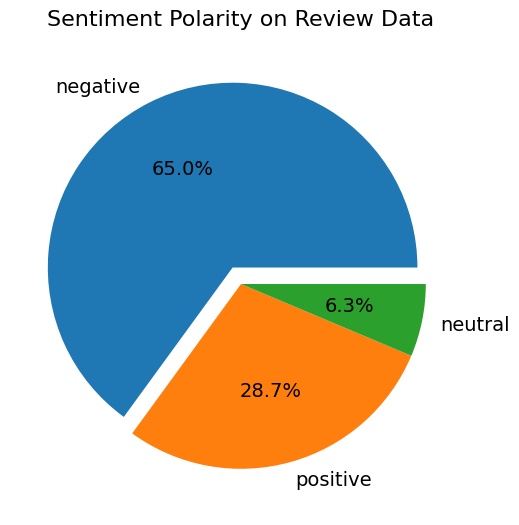

In [13]:
# Membuat objek gambar dan sumbu dengan ukuran (6, 6) inci.
fig, ax = plt.subplots(figsize=(6, 6))

# Mengambil jumlah data polaritas sentimen dari DataFrame 'clean_df' dan menyimpannya dalam list 'sizes'.
sizes = [count for count in clean_df['polarity'].value_counts()]

# Mengambil label atau kategori sentimen dari DataFrame 'clean_df' dan menyimpannya dalam list 'labels'.
labels = list(clean_df['polarity'].value_counts().index)

# Menentukan seberapa jauh potongan dari pie chart akan ditarik (0.1 artinya potongan pertama akan sedikit terpisah).
explode = (0.1, 0, 0)

# Membuat pie chart dengan data 'sizes', 'labels', dan 'explode' yang telah ditentukan.
# Autopct digunakan untuk menampilkan persentase di dalam setiap potongan pie.
# Textprops digunakan untuk mengatur ukuran font teks dalam pie chart.
ax.pie(x=sizes, labels=labels, autopct='%1.1f%%', explode=explode, textprops={'fontsize': 14})
ax.set_title('Sentiment Polarity on Review Data', fontsize=16, pad=20)
plt.show()

# Label Exploration

## Pembuatan Dataframe untuk Setiap Label

In [14]:
def label_dataframe(df, option='neutral'):
    # Mengatur opsi tampilan Pandas agar kolom dapat menampilkan teks hingga 3000 karakter.
    pd.set_option('display.max_colwidth', 3000)

    # Membuat DataFrame baru yang hanya berisi tweet dengan polaritas tertentu.
    reviews = df[df['polarity'] == option]

    # Memilih hanya kolom-kolom tertentu dari DataFrame 'reviews'.
    reviews = reviews[['text_akhir', 'polarity_score', 'polarity','text_stopword']]

    # Mengurutkan DataFrame 'reviews' berdasarkan 'polarity_score' secara menurun.
    reviews = reviews.sort_values(by='polarity_score', ascending=False)

    # Mengatur ulang indeks DataFrame agar dimulai dari 0.
    reviews = reviews.reset_index(drop=True)
    reviews.index += 1

    return reviews

In [15]:
positive_reviews = label_dataframe(clean_df, 'positive')

positive_reviews.head()

,text_akhir,polarity_score,polarity,text_stopword
1,harga paket internet harga paket malam gb harga rb sudh pas jujur paket internet terbaik telkomsel harga terjangkau masuk thun harga rb udh kwatir bner thun maret harga mkin kecewa harga segitu beli paket promo gb rb telkomsel tutup telinga komplen harga,44,positive,"[harga, paket, internet, harga, paket, malam, gb, harga, rb, sudh, pas, jujur, paket, internet, terbaik, telkomsel, harga, terjangkau, masuk, thun, harga, rb, udh, kwatir, bner, thun, maret, harga, mkin, kecewa, harga, segitu, beli, paket, promo, gb, rb, telkomsel, tutup, telinga, komplen, harga]"
2,pakai nomor telkomsel sebelumsebelumnya banyk penawaran paket murah nomor pakai nomor banget nelpon gratis sms gratis internet lain-lain gratis murah susah paket murahmurah bayak gratis dipersulit daftar paket internet gratis nelpon gratis sms gratis lain-lain telkomsel tolong dipersulit hilang pelanggan,42,positive,"[pakai, nomor, telkomsel, sebelumsebelumnya, banyk, penawaran, paket, murah, nomor, pakai, nomor, banget, nelpon, gratis, sms, gratis, internet, lain-lain, gratis, murah, susah, paket, murahmurah, bayak, gratis, dipersulit, daftar, paket, internet, gratis, nelpon, gratis, sms, gratis, lain-lain, telkomsel, tolong, dipersulit, hilang, pelanggan]"
3,aplikasi telkomsel inisaya senang mudah beli kuota harga paket kecewa perubahan harga nyabukanya kasih promo harga udh harga paket mahalpromo gk adaharga naikintolong lh harga paket turunin mohon respon terimakasih,39,positive,"[aplikasi, telkomsel, inisaya, senang, mudah, beli, kuota, harga, paket, kecewa, perubahan, harga, nyabukanya, kasih, promo, harga, udh, harga, paket, mahalpromo, gk, adaharga, naikintolong, lh, harga, paket, turunin, mohon, respon, terimakasih]"
4,hormat tanggal agustus paket murah setahun kecewa maksimal kecepatan lemaaaahh dasar org pelit kru pengguna telkomsel dukung telkomsel terbaik memohon harga produk telkomsel diturunkan suka suka berpaling op harga produk sel terimakasih,38,positive,"[hormat, tanggal, agustus, paket, murah, setahun, kecewa, maksimal, kecepatan, lemaaaahh, dasar, org, pelit, kru, pengguna, telkomsel, dukung, telkomsel, terbaik, memohon, harga, produk, telkomsel, diturunkan, suka, suka, berpaling, op, harga, produk, sel, terimakasih]"
5,fitur opsi pilihan paket bagus penukaran poin tolong fokus poin biaya tambahan kualitas jaringan turun jam mohon diperbaiki tolong menyetarakan harga kualitas harga mahal kualitas bagus terimakasih,38,positive,"[fitur, opsi, pilihan, paket, bagus, penukaran, poin, tolong, fokus, poin, biaya, tambahan, kualitas, jaringan, turun, jam, mohon, diperbaiki, tolong, menyetarakan, harga, kualitas, harga, mahal, kualitas, bagus, terimakasih]"


In [16]:
negative_reviews = label_dataframe(clean_df, 'negative')

negative_reviews.head()

,text_akhir,polarity_score,polarity,text_stopword
1,dasar akal banget jaringan jelek harga paket mahal boros banget sumpah kuota bagusan xl jakarta,-1,negative,"[dasar, akal, banget, jaringan, jelek, harga, paket, mahal, boros, banget, sumpah, kuota, bagusan, xl, jakarta]"
2,gajelas telkomsel jelek koneksinya lambat suka ngelag aplikasinya menghambat transaksi saranin indosat,-1,negative,"[gajelas, telkomsel, jelek, koneksinya, lambat, suka, ngelag, aplikasinya, menghambat, transaksi, saranin, indosat]"
3,kecewa penggunaaan trasnsaksi gagal saldo kepotong paket masuk,-1,negative,"[kecewa, penggunaaan, trasnsaksi, gagal, saldo, kepotong, paket, masuk]"
4,aplikasinya bagus kecewa kali sms akses internet tarif non paket pulsa potong kartu hp hp android nomor telkomsel,-1,negative,"[aplikasinya, bagus, kecewa, kali, sms, akses, internet, tarif, non, paket, pulsa, potong, kartu, hp, hp, android, nomor, telkomsel]"
5,aplikasinya berat giga fitur ui berat aplikasi beli paket doang,-1,negative,"[aplikasinya, berat, giga, fitur, ui, berat, aplikasi, beli, paket, doang]"


In [17]:
neutral_reviews = label_dataframe(clean_df, 'neutral')

neutral_reviews.head()

,text_akhir,polarity_score,polarity,text_stopword
1,terimakasih mendengar masukan fungsi lock button nambah saran buka beranda pulsa paket tolong ditulis bawahnya tanggal expired diketuk x suka otak atik menu,0,neutral,"[terimakasih, mendengar, masukan, fungsi, lock, button, nambah, saran, buka, beranda, pulsa, paket, tolong, ditulis, bawahnya, tanggal, expired, diketuk, x, suka, otak, atik, menu]"
2,tsel ancuran njeng sinyal ilangan daerah pantai anyer mahal doang paket internet jaringan busuk bangkek,0,neutral,"[tsel, ancuran, njeng, sinyal, ilangan, daerah, pantai, anyer, mahal, doang, paket, internet, jaringan, busuk, bangkek]"
3,sehabis membeli paket gb jaringan disconect notif internet sebabkan kuota internet,0,neutral,"[sehabis, membeli, paket, gb, jaringan, disconect, notif, internet, sebabkan, kuota, internet]"
4,jaringan perbaiki lambat,0,neutral,"[jaringan, perbaiki, lambat]"
5,telkomsel fitur klaim kepemilikan akun nomer telepon fiturnya mirif sprt pinjol poto ktp selfi megang ktp persyaratan registrasi,0,neutral,"[telkomsel, fitur, klaim, kepemilikan, akun, nomer, telepon, fiturnya, mirif, sprt, pinjol, poto, ktp, selfi, megang, ktp, persyaratan, registrasi]"


## Visualisasi Word Cloud

In [18]:
def visualize_word_cloud(df, option='All'):
    # Membuat string kosong 'list_words' yang akan digunakan untuk mengumpulkan semua kata dari teks yang sudah dibersihkan.
    list_words = ''

    # Iterasi melalui setiap review dalam kolom 'text_stopword' dari DataFrame.
    for review in df['text_stopword']:
        for word in review:
            list_words += ' ' + (word)

    # Membuat objek WordCloud dengan parameter tertentu.
    wordcloud = WordCloud(width=600, height=400, background_color='white', min_font_size=10).generate(list_words)

    # Menampilkan word cloud.
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.set_title(f'Word Cloud of {option} Reviews Data', fontsize=18)
    ax.grid(False)
    ax.imshow((wordcloud))
    fig.tight_layout(pad=0)
    ax.axis('off')
    plt.show()

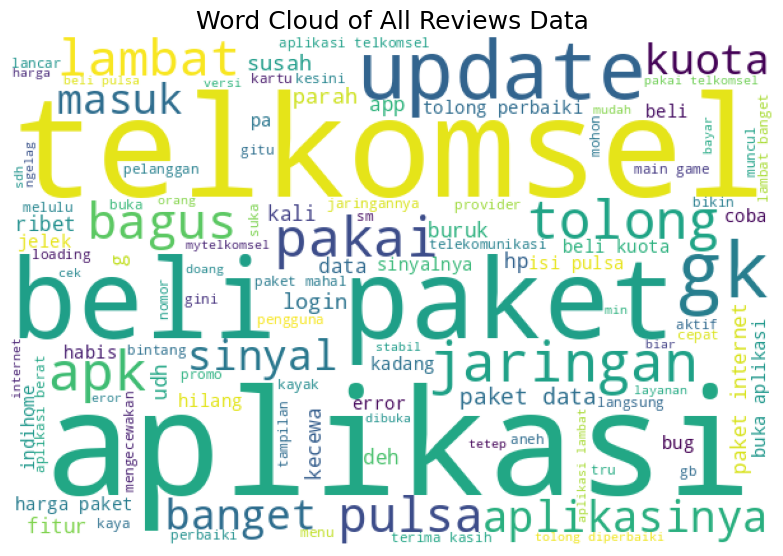

In [19]:
visualize_word_cloud(clean_df, option='All')

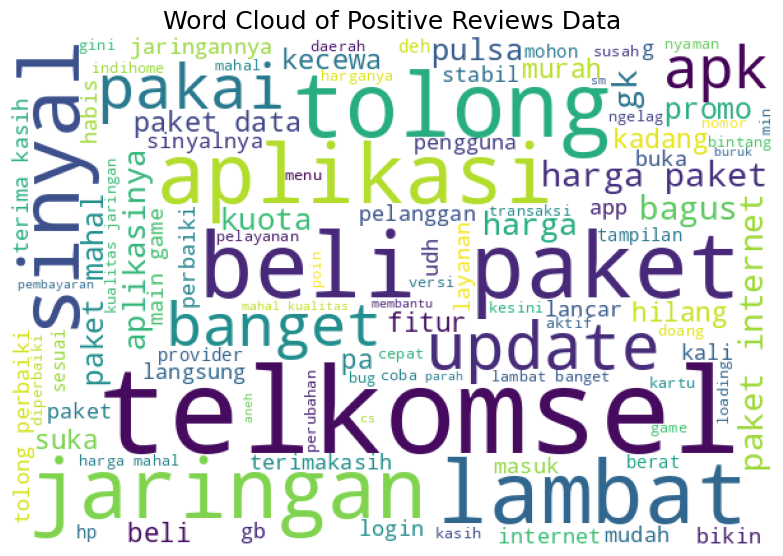

In [20]:
visualize_word_cloud(positive_reviews, option='Positive')

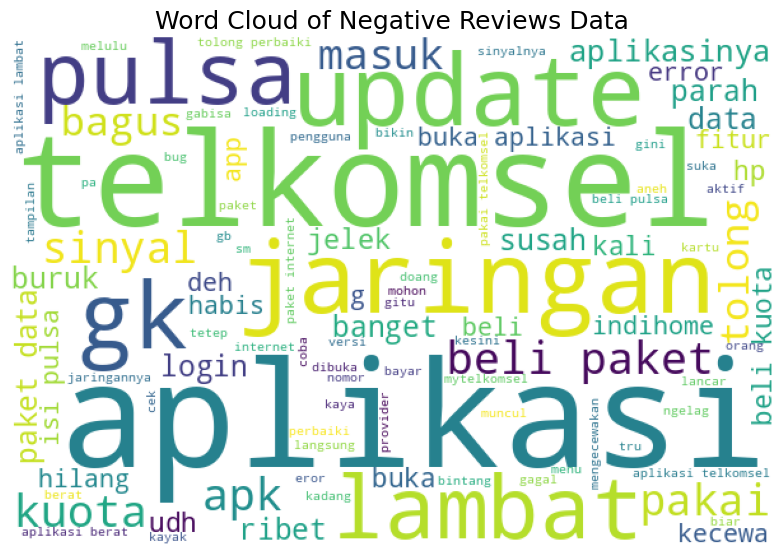

In [21]:
visualize_word_cloud(negative_reviews, option='Negative')

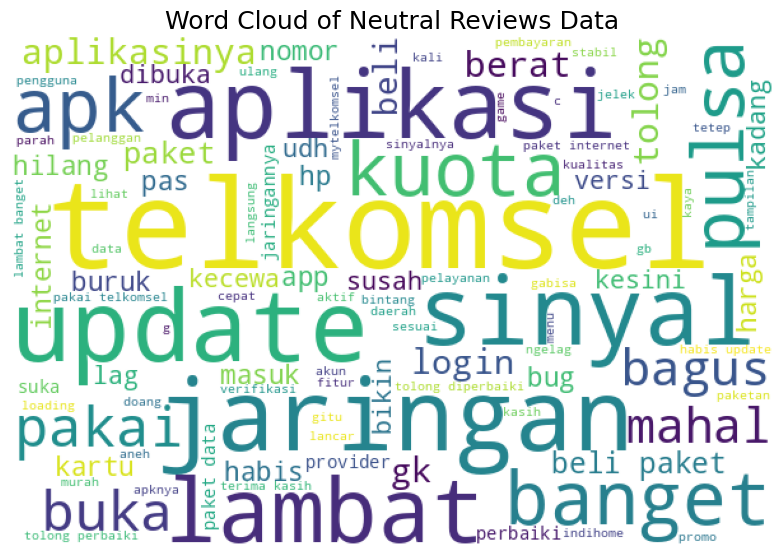

In [22]:
visualize_word_cloud(neutral_reviews, option='Neutral')

# Data Splitting & Feature Extraction

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, precision_score

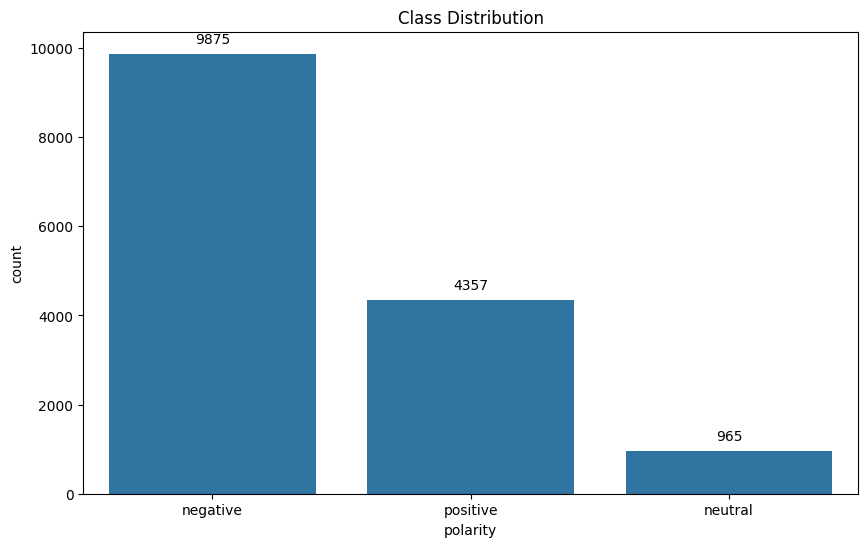

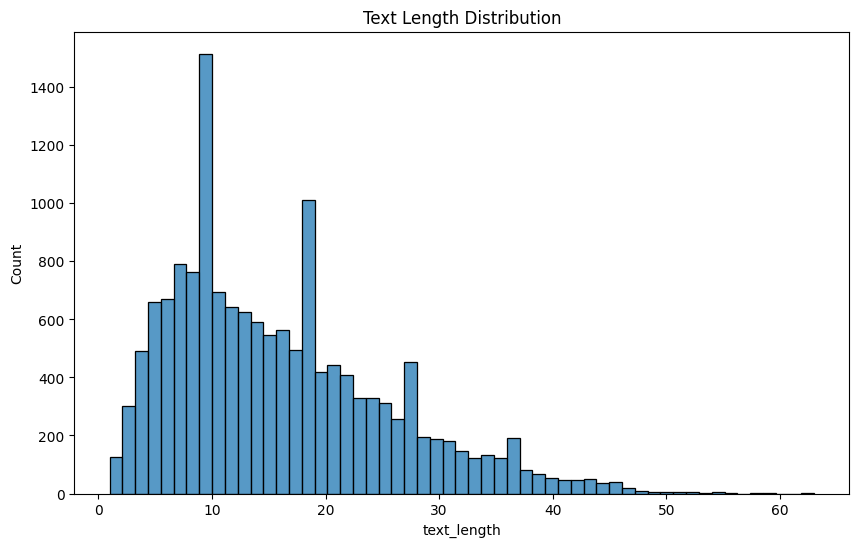

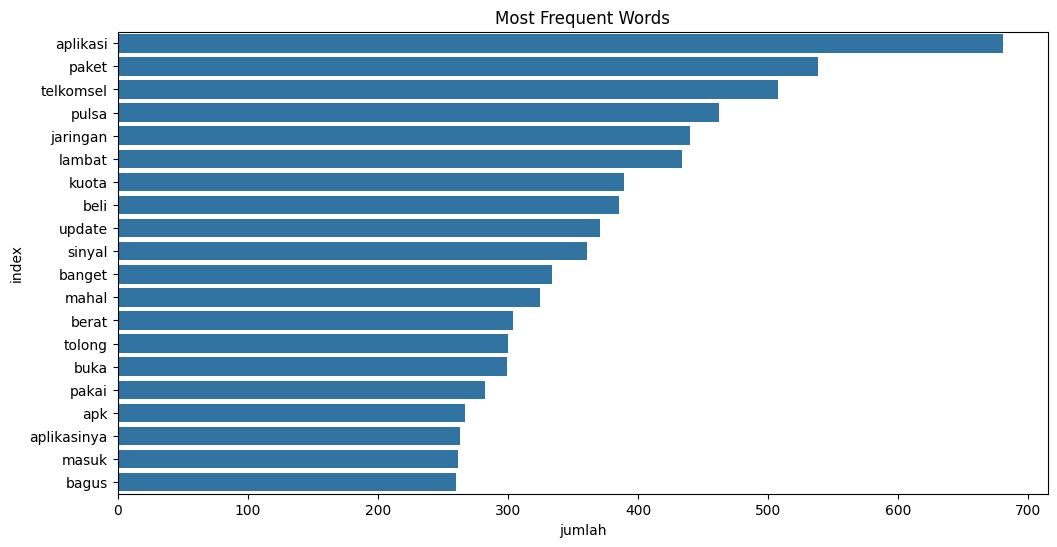

In [24]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Check class distribution
class_dist_plot = sns.countplot(x='polarity', data=clean_df)
plt.title('Class Distribution')

# Add counts above the bars on the plot
for p in class_dist_plot.patches:
    class_dist_plot.annotate(format(p.get_height(), '.0f'),
                              (p.get_x() + p.get_width() / 2., p.get_height()),
                              ha='center', va='center',
                              xytext=(0, 10),
                              textcoords='offset points')

plt.show()

# Set the figure size
plt.figure(figsize=(10, 6))

# Visualize text length distribution
clean_df['text_length'] = clean_df['text_akhir'].apply(lambda x: len(x.split()))
sns.histplot(clean_df['text_length'])
plt.title('Text Length Distribution')
plt.show()

# Set the figure size
plt.figure(figsize=(12, 6))

# Visualize most frequent words
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(clean_df['text_akhir'])
tfidf_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
tfidf_df = tfidf_df.sum().reset_index(name='jumlah')
tfidf_df = tfidf_df.sort_values('jumlah', ascending=False).head(20)
sns.barplot(x='jumlah', y='index', data=tfidf_df)
plt.title('Most Frequent Words')
plt.show()

In [25]:
# Pisahkan data menjadi fitur (tweet) dan label (sentimen)
X = clean_df['text_akhir']
y = clean_df['polarity']

# Ekstraksi fitur dengan TF-IDF
tfidf = TfidfVectorizer(max_features=200, min_df=17, max_df=0.8 )
X_tfidf = tfidf.fit_transform(X)

# Konversi hasil ekstraksi fitur menjadi dataframe
features_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf.get_feature_names_out())

# Menampilkan hasil ekstraksi fitur
features_df

,akses,aktif,akun,ampun,aneh,apk,aplikasi,aplikasinya,app,bagus,...,uang,udh,ui,ulang,update,utama,verifikasi,versi,wifi,youtube
0,0.0,0.0,0.0,0.0,0.366414,0.0,0.178412,0.280533,0.0,0.00000,...,0.0,0.000000,0.000000,0.0,0.495539,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.000000,0.0,0.358773,0.000000,0.0,0.17967,...,0.0,0.235826,0.000000,0.0,0.332164,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.000000,0.0,0.126682,0.199193,0.0,0.00000,...,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.000000,0.0,0.134101,0.000000,0.0,0.00000,...,0.0,0.000000,0.325383,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.000000,0.0,0.154153,0.000000,0.0,0.00000,...,0.0,0.000000,0.000000,0.0,0.214079,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15192,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.00000,...,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
15193,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.00000,...,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
15194,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.00000,...,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
15195,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.00000,...,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


In [26]:
# Bagi data menjadi data latih dan data uji, parameter stratify memastikan kelas target dengan proporsi sesuai data awal
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42, stratify=y)

# Modelling

In [27]:
from sklearn.naive_bayes import BernoulliNB

# Membuat objek model Naive Bayes (Bernoulli Naive Bayes)
naive_bayes = BernoulliNB()

# Melatih model Naive Bayes pada data pelatihan
naive_bayes.fit(X_train.toarray(), y_train)

# Prediksi sentimen pada data pelatihan dan data uji
y_pred_train_nb = naive_bayes.predict(X_train.toarray())
y_pred_test_nb = naive_bayes.predict(X_test.toarray())

# Evaluasi akurasi model Naive Bayes
accuracy_train_nb = accuracy_score(y_pred_train_nb, y_train)
accuracy_test_nb = accuracy_score(y_pred_test_nb, y_test)

# Menampilkan akurasi
print('Naive Bayes - accuracy_train:', accuracy_train_nb)
print('Naive Bayes - accuracy_test:', accuracy_test_nb)

Naive Bayes - accuracy_train: 0.7582462778646047
Naive Bayes - accuracy_test: 0.7572368421052632


In [28]:
from sklearn.ensemble import RandomForestClassifier

# Membuat objek model Random Forest
random_forest = RandomForestClassifier()

# Melatih model Random Forest pada data pelatihan
random_forest.fit(X_train.toarray(), y_train)

# Prediksi sentimen pada data pelatihan dan data uji
y_pred_train_rf = random_forest.predict(X_train.toarray())
y_pred_test_rf = random_forest.predict(X_test.toarray())

# Evaluasi akurasi model Random Forest
accuracy_train_rf = accuracy_score(y_pred_train_rf, y_train)
accuracy_test_rf = accuracy_score(y_pred_test_rf, y_test)

# Menampilkan akurasi
print('Random Forest - accuracy_train:', accuracy_train_rf)
print('Random Forest - accuracy_test:', accuracy_test_rf)

Random Forest - accuracy_train: 0.9927613720490253
Random Forest - accuracy_test: 0.7950657894736842


In [29]:
from sklearn.linear_model import LogisticRegression

# Membuat objek model Logistic Regression
logistic_regression = LogisticRegression()

# Melatih model Logistic Regression pada data pelatihan
logistic_regression.fit(X_train.toarray(), y_train)

# Prediksi sentimen pada data pelatihan dan data uji
y_pred_train_lr = logistic_regression.predict(X_train.toarray())
y_pred_test_lr = logistic_regression.predict(X_test.toarray())

# Evaluasi akurasi model Logistic Regression pada data pelatihan
accuracy_train_lr = accuracy_score(y_pred_train_lr, y_train)

# Evaluasi akurasi model Logistic Regression pada data uji
accuracy_test_lr = accuracy_score(y_pred_test_lr, y_test)

# Menampilkan akurasi
print('Logistic Regression - accuracy_train:', accuracy_train_lr)
print('Logistic Regression - accuracy_test:', accuracy_test_lr)

Logistic Regression - accuracy_train: 0.8375421567821009
Logistic Regression - accuracy_test: 0.8365131578947368


In [30]:
from sklearn.tree import DecisionTreeClassifier

# Membuat objek model Decision Tree
decision_tree = DecisionTreeClassifier()

# Melatih model Decision Tree pada data pelatihan
decision_tree.fit(X_train.toarray(), y_train)

# Prediksi sentimen pada data pelatihan dan data uji
y_pred_train_dt = decision_tree.predict(X_train.toarray())
y_pred_test_dt = decision_tree.predict(X_test.toarray())

# Evaluasi akurasi model Decision Tree
accuracy_train_dt = accuracy_score(y_pred_train_dt, y_train)
accuracy_test_dt = accuracy_score(y_pred_test_dt, y_test)

# Menampilkan akurasi
print('Decision Tree - accuracy_train:', accuracy_train_dt)
print('Decision Tree - accuracy_test:', accuracy_test_dt)

Decision Tree - accuracy_train: 0.9928436291848318
Decision Tree - accuracy_test: 0.7003289473684211


## Deep Learning Modelling (Bonus Nomor 1)

In [31]:
!pip install tensorflow

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, SpatialDropout1D
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

In [49]:
# Initialize the tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(clean_df['text_akhir'])

# Get the word index
word_index = tokenizer.word_index
print(f"Number of unique words: {len(word_index)}")

# Get the word frequencies
word_counts = tokenizer.word_counts
print(f"Top 10 most common words: {list(word_counts.items())[:10]}")

Number of unique words: 21326
Top 10 most common words: [('aplikasi', 6451), ('aneh', 509), ('update', 2362), ('lambat', 2958), ('kebuka', 87), ('otomatis', 173), ('tutup', 47), ('indihome', 732), ('dipisah', 18), ('cek', 757)]


In [50]:
# Calculate the lengths of the texts
text_lengths = clean_df['text_akhir'].apply(lambda x: len(x.split()))

# Print some statistics
print(f"Average text length: {text_lengths.mean()}")
print(f"Median text length: {text_lengths.median()}")
print(f"Max text length: {text_lengths.max()}")

Average text length: 16.010133578995855
Median text length: 14.0
Max text length: 63


In [51]:
num_words = len(word_index) + 10  # Covering unique words
maxlen = text_lengths.max() + 10  # Covering max length of the text

In [52]:
X = clean_df['text_akhir']
y = clean_df['polarity']

# Convert labels to categorical values
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_categorical = to_categorical(y_encoded)

In [53]:
tokenizer = Tokenizer(num_words=num_words)
tokenizer.fit_on_texts(X)
X_tokenized = tokenizer.texts_to_sequences(X)
X_padded = pad_sequences(X_tokenized, maxlen=maxlen)

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X_padded, y_categorical, test_size=0.2, random_state=42, stratify=y_categorical)

In [55]:
dl_model = Sequential()
dl_model.add(Embedding(input_dim=num_words, output_dim=128, input_length=maxlen))
dl_model.add(SpatialDropout1D(0.2))
dl_model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
dl_model.add(Dense(3, activation='softmax'))

dl_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print the model summary
dl_model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ spatial_dropout1d_2                  │ ?                           │     0 (unbuilt) │
│ (SpatialDropout1D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [56]:
dl_model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test), verbose=1)

Epoch 1/5
380/380 ━━━━━━━━━━━━━━━━━━━━ 55s 139ms/step - accuracy: 0.6992 - loss: 0.7254 - val_accuracy: 0.8618 - val_loss: 0.3879
Epoch 2/5
380/380 ━━━━━━━━━━━━━━━━━━━━ 51s 135ms/step - accuracy: 0.9050 - loss: 0.2745 - val_accuracy: 0.8783 - val_loss: 0.3413
Epoch 3/5
380/380 ━━━━━━━━━━━━━━━━━━━━ 90s 156ms/step - accuracy: 0.9376 - loss: 0.1752 - val_accuracy: 0.8819 - val_loss: 0.3632
Epoch 4/5
380/380 ━━━━━━━━━━━━━━━━━━━━ 85s 165ms/step - accuracy: 0.9610 - loss: 0.1173 - val_accuracy: 0.8740 - val_loss: 0.3896
Epoch 5/5
380/380 ━━━━━━━━━━━━━━━━━━━━ 76s 149ms/step - accuracy: 0.9723 - loss: 0.0859 - val_accuracy: 0.8641 - val_loss: 0.4566


In [57]:
# Evaluasi akurasi model RNN LSTM
_, accuracy_train_dl = dl_model.evaluate(X_train, y_train)
_, accuracy_test_dl = dl_model.evaluate(X_test, y_test)

# Menampilkan akurasi
print('Deep Learning (RNN LSTM) - accuracy_train:', accuracy_train_dl)
print('Deep Learning (RNN LSTM) - accuracy_test:', accuracy_test_dl)

380/380 ━━━━━━━━━━━━━━━━━━━━ 13s 33ms/step - accuracy: 0.9850 - loss: 0.0476
95/95 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.8695 - loss: 0.4472
Deep Learning (RNN LSTM) - accuracy_train: 0.9851937294006348
Deep Learning (RNN LSTM) - accuracy_test: 0.8641447424888611


## Pemilihan Model dengan Akurasi Tertinggi

In [58]:
# Membuat DataFrame untuk hasil akurasi
results_df = pd.DataFrame({
    'Model': ['Naive Bayes', 'Random Forest', 'Logistic Regression', 'Decision Tree', 'Recurrent Neural Network'],
    'Accuracy Train': [accuracy_train_nb, accuracy_train_rf, accuracy_train_lr, accuracy_train_dt, accuracy_train_dl],
    'Accuracy Test': [accuracy_test_nb, accuracy_test_rf, accuracy_test_lr, accuracy_test_dt, accuracy_test_dl]
})
# Menampilkan hanya kolom "Accuracy Test"
accuracy_test_only = results_df[['Model', 'Accuracy Test']]
print(accuracy_test_only)

                      Model  Accuracy Test
0               Naive Bayes       0.757237
1             Random Forest       0.795066
2       Logistic Regression       0.836513
3             Decision Tree       0.700329
4  Recurrent Neural Network       0.864145


In [59]:
# Mengurutkan DataFrame berdasarkan kolom "Accuracy Test" dari tertinggi ke terendah
accuracy_test_sorted = accuracy_test_only.sort_values(by='Accuracy Test', ascending=False)

# Menampilkan DataFrame yang telah diurutkan
print(accuracy_test_sorted)

                      Model  Accuracy Test
4  Recurrent Neural Network       0.864145
2       Logistic Regression       0.836513
1             Random Forest       0.795066
0               Naive Bayes       0.757237
3             Decision Tree       0.700329


# Inference/Testing (Bonus Nomor 6)

In [69]:
# Input kalimat baru dari pengguna
kalimat_baru = input("Masukkan kalimat baru: ")

# Melakukan preprocessing pada kalimat baru
kalimat_baru_cleaned = cleaningText(kalimat_baru)
kalimat_baru_casefolded = casefoldingText(kalimat_baru_cleaned)
kalimat_baru_slangfixed = fix_slangwords(kalimat_baru_casefolded)
kalimat_baru_tokenized = tokenizingText(kalimat_baru_slangfixed)
kalimat_baru_filtered = filteringText(kalimat_baru_tokenized)
kalimat_baru_final = toSentence(kalimat_baru_filtered)

# Menggunakan tokenize dan padding yang sudah di-fit dari pelatihan sebelumnya
new_input_tokenized = tokenizer.texts_to_sequences(kalimat_baru_final)
new_input_padded = pad_sequences(new_input_tokenized, maxlen=maxlen)

# Predict the probabilities
predictions = dl_model.predict(new_input_padded)

# Get the index of the highest probability
predicted_index = np.argmax(predictions, axis=1)

# Map the index to the class name
predicted_class = label_encoder.inverse_transform(predicted_index)

print(f"Predicted class: {predicted_class[0]}")
print(f"Probabilities: {predictions[0]}")

Masukkan kalimat baru: aplikasi ini jelek, tapi paketnya lumayan bagus lah
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Predicted class: neutral
Probabilities: [0.05682972 0.8676703  0.0754999 ]
